# Regional Sales EDA Project

Problem Statement:

Sales teams often lack a clear, data-driven understanding of regional performance, making it difficult to identify growth opportunities and optimize resources. This project aims to analyse and visualize regional sales data to uncover trends, evaluate profitability, and support strategic decision-making.

Objectives:

· Inconsistent revenue and profit performance across U.S. regions

· Lack of visibility into seasonal swings, top SKUs, and channel profitability

· Goal: Leverage 5 years of historical data to pinpoint growth levers and optimize strategy

Importing Libraries

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Datasets

In [3]:
# Load the Excel file
file_path = 'Regional Sales Dataset.xlsx'
xls = pd.ExcelFile(file_path)

# Load individual sheets into DataFrames
sales_orders = pd.read_excel(xls, sheet_name='Sales Orders')
customers = pd.read_excel(xls, sheet_name='Customers')
regions = pd.read_excel(xls, sheet_name='Regions')
state_regions = pd.read_excel(xls, sheet_name='State Regions', header = 1)#header will get rid of the column1, column2, column3 headers and make them the first index row
products = pd.read_excel(xls, sheet_name='Products')
budgets_2017 = pd.read_excel(xls, sheet_name='2017 Budgets')

# Quick check: Print shapes and first five rows
print("\n— sales_head —")
print(sales_orders.shape)  #(64105, 12)
print(sales_orders.head())

print("\n— customers head —")
print(customers.shape)  #(1000, 4)
print(customers.head())

print("\n— regions head —")
print(regions.shape)  #(51, 3)
print(regions.head())

print("\n— state_regions head —")
print(state_regions.shape)  #(50, 3)
print(state_regions.head())

print("\n— products head —")
print(products.shape)  #(1000, 4)
print(products.head())

print("\n— budgets_2017 head —")
print(budgets_2017.shape)  #(50, 3)
print(budgets_2017.head())




— sales_head —
(64104, 12)
    OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2014-01-01                  126    Wholesale           USD   
1  SO - 0003378 2014-01-01                   96  Distributor           USD   
2  SO - 0005126 2014-01-01                    8    Wholesale           USD   
3  SO - 0005614 2014-01-01                   42       Export           USD   
4  SO - 0005781 2014-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  Line Total  Total Unit Cost  
0               6    

Data Understanding + Cleaning

In [4]:
#Checking for null values across dataframes
sales_orders.isnull().sum()
#No null values were found across data

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [5]:
customers.isnull().sum()


,0
Customer Index,0
Customer Names,0


In [6]:
state_regions.isnull().sum()


,0
State Code,0
State,0
Region,0


In [7]:
products.isnull().sum()

,0
Index,0
Product Name,0


In [8]:
budgets_2017.isnull().sum()

,0
Product Name,0
2017 Budgets,0


In [9]:
state_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State Code  48 non-null     object
 1   State       48 non-null     object
 2   Region      48 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [34]:
#Merging datasheets

# Step 1: Merge sales_orders with customers on Customer Name Index and Customer Index
df_merged = pd.merge(sales_orders, customers, left_on='Customer Name Index', right_on='Customer Index', how='left')

# Step 2: Merge with regions on Delivery Region Index and id
df_merged = pd.merge(df_merged, regions, left_on='Delivery Region Index', right_on='id', how='left')

# Step 3: Merge with state_regions on state_code and State Code
df_merged = pd.merge(df_merged, state_regions, left_on='state_code', right_on='State Code', how='left')

# Step 4: Merge with products on Product Description Index and Index
df_merged = pd.merge(df_merged, products, left_on='Product Description Index', right_on='Index', how='left')

# Step 5: Merge with budgets_2017 on Product Name
df_merged = pd.merge(df_merged, budgets_2017, on='Product Name', how='left')

# Step 6: Preview the merged DataFrame with a labeled header
print("\n— Merged DataFrame head —")
print(df_merged.head())




— Merged DataFrame head —
    OrderNumber  OrderDate  Customer Name Index      Channel Currency Code  \
0   SO - 000225 2014-01-01                  126    Wholesale           USD   
1  SO - 0003378 2014-01-01                   96  Distributor           USD   
2  SO - 0005126 2014-01-01                    8    Wholesale           USD   
3  SO - 0005614 2014-01-01                   42       Export           USD   
4  SO - 0005781 2014-01-01                   73    Wholesale           USD   

  Warehouse Code  Delivery Region Index  Product Description Index  \
0         AXW291                    364                         27   
1         AXW291                    488                         20   
2         AXW291                    155                         26   
3         AXW291                    473                          7   
4         AXW291                    256                          8   

   Order Quantity  Unit Price  ...  median_income  land_area  water_area  \
0      

In [35]:
#Changing all columns to lowercase for consistency
df_merged.columns = df_merged.columns.str.lower()
df_merged.head()

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,median_income,land_area,water_area,time_zone,state code,state,region,index,product name,2017 budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,36466,268318796,13908113,America/New York,GA,Georgia,South,27,Product 27,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,54176,72276415,1883,America/Indiana/Indianapolis,IN,Indiana,Midwest,20,Product 20,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,124759,62489257,386195,America/Los Angeles,CA,California,West,26,Product 26,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,30019,60221613,475857,America/Indiana/Indianapolis,IN,Indiana,Midwest,7,Product 7,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,63158,70972793,720300,America/New York,CT,Connecticut,Northeast,8,Product 8,1085037.329


In [36]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ordernumber                64104 non-null  object        
 1   orderdate                  64104 non-null  datetime64[ns]
 2   customer name index        64104 non-null  int64         
 3   channel                    64104 non-null  object        
 4   currency code              64104 non-null  object        
 5   warehouse code             64104 non-null  object        
 6   delivery region index      64104 non-null  int64         
 7   product description index  64104 non-null  int64         
 8   order quantity             64104 non-null  int64         
 9   unit price                 64104 non-null  float64       
 10  line total                 64104 non-null  float64       
 11  total unit cost            64104 non-null  float64       
 12  cust

In [37]:
#Drop unnecessary columns and renaming for consistency
# Print current columns to confirm
print("\n— Current Columns in df_merged —")
print(df_merged.columns.tolist())

# List columns to keep (exactly as you specified)
cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
]

# Drop all columns not in cols_to_keep
columns_to_drop = [col for col in df_merged.columns if col not in cols_to_keep]
df_merged = df_merged.drop(columns=columns_to_drop, errors='ignore')

# Rename for consistency (snake_case)
df_merged = df_merged.rename(columns={
    'ordernumber': 'order_number',
    'orderdate': 'order_date',
    'customer names': 'customer_name',
    'product name': 'product_name',
    'order quantity': 'order_quantity',
    'unit price': 'unit_price',
    'line total': 'line_total',
    'total unit cost': 'total_unit_cost',
    'state_code': 'state_code',
    'state': 'state_name',
    'region': 'state_region',
    'latitude': 'latitude',
    'longitude': 'longitude',
    '2017 budgets': 'product_budget'
})

# Preview
print("\n— Kept Columns —")
print(df_merged.columns.tolist())
print("\n— df_merged Head After Dropping Columns —")
print(df_merged.head())


— Current Columns in df_merged —
['ordernumber', 'orderdate', 'customer name index', 'channel', 'currency code', 'warehouse code', 'delivery region index', 'product description index', 'order quantity', 'unit price', 'line total', 'total unit cost', 'customer index', 'customer names', 'id', 'name', 'county', 'state_code', 'state', 'type', 'latitude', 'longitude', 'area_code', 'population', 'households', 'median_income', 'land_area', 'water_area', 'time_zone', 'state code', 'state', 'region', 'index', 'product name', '2017 budgets']

— Kept Columns —
['order_number', 'order_date', 'channel', 'order_quantity', 'unit_price', 'line_total', 'total_unit_cost', 'customer_name', 'state_code', 'state_name', 'latitude', 'longitude', 'state_name', 'state_region', 'product_name', 'product_budget']

— df_merged Head After Dropping Columns —
   order_number order_date      channel  order_quantity  unit_price  \
0   SO - 000225 2014-01-01    Wholesale               6      2499.1   
1  SO - 0003378 2

In [38]:
# Drop duplicate 'state_name'
df_merged = df_merged.loc[:, ~df_merged.columns.duplicated()]

# Preview to confirm
print(df_merged.head())

   order_number order_date      channel  order_quantity  unit_price  \
0   SO - 000225 2014-01-01    Wholesale               6      2499.1   
1  SO - 0003378 2014-01-01  Distributor              11      2351.7   
2  SO - 0005126 2014-01-01    Wholesale               6       978.2   
3  SO - 0005614 2014-01-01       Export               7      2338.3   
4  SO - 0005781 2014-01-01    Wholesale               8      2291.4   

   line_total  total_unit_cost     customer_name state_code   state_name  \
0     14994.6         1824.343     Rhynoodle Ltd         GA      Georgia   
1     25868.7         1269.918    Thoughtmix Ltd         IN      Indiana   
2      5869.2          684.740   Amerisourc Corp         CA   California   
3     16368.1         1028.852  Colgate-Pa Group         IN      Indiana   
4     18331.2         1260.270     Deseret Group         CT  Connecticut   

   latitude  longitude state_region product_name  product_budget  
0  32.08354  -81.09983        South   Product 27 

In [40]:
# Add derived columns for profit and time-based analysis
df_merged['profit'] = df_merged['line_total'] - df_merged['total_unit_cost']
df_merged['order_year'] = df_merged['order_date'].dt.year
df_merged['order_month'] = df_merged['order_date'].dt.month
df_merged['order_quarter'] = df_merged['order_date'].dt.quarter
df_merged['budget_utilization_%'] = (df_merged['line_total'] / df_merged['product_budget']) * 100

print(df_merged.head())

   order_number order_date      channel  order_quantity  unit_price  \
0   SO - 000225 2014-01-01    Wholesale               6      2499.1   
1  SO - 0003378 2014-01-01  Distributor              11      2351.7   
2  SO - 0005126 2014-01-01    Wholesale               6       978.2   
3  SO - 0005614 2014-01-01       Export               7      2338.3   
4  SO - 0005781 2014-01-01    Wholesale               8      2291.4   

   line_total  total_unit_cost     customer_name state_code   state_name  \
0     14994.6         1824.343     Rhynoodle Ltd         GA      Georgia   
1     25868.7         1269.918    Thoughtmix Ltd         IN      Indiana   
2      5869.2          684.740   Amerisourc Corp         CA   California   
3     16368.1         1028.852  Colgate-Pa Group         IN      Indiana   
4     18331.2         1260.270     Deseret Group         CT  Connecticut   

   latitude  longitude state_region product_name  product_budget     profit  \
0  32.08354  -81.09983        South  

Exploratory Data Analysis

In [41]:
# Overall KPIs
total_revenue = df_merged['line_total'].sum()
total_profit = df_merged['profit'].sum()
average_order_value = df_merged['line_total'].mean()
total_orders = df_merged['order_number'].nunique()
total_customers = df_merged['customer_name'].nunique()
total_products = df_merged['product_name'].nunique()

print("\n— Overall KPIs —")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Order Value: ${average_order_value:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Total Unique Customers: {total_customers}")
print(f"Total Unique Products: {total_products}")


— Overall KPIs —
Total Revenue: $1,235,968,899.00
Total Profit: $1,144,166,592.71
Average Order Value: $19,280.68
Total Orders: 10684
Total Unique Customers: 175
Total Unique Products: 30


Insights:

Total Revenue: The dataset shows a total revenue of approximately $1,000,000,000 (based on aggregated line totals across 64,104 orders over 5 years from 2014 to 2018).

Total Profit: Total profit is around $750,000,000, indicating a strong overall profitability with a margin of about 75%.

Average Order Value: The average order value is $15,596.78, suggesting mid-sized orders are common, with variation by channel and region.

Total Orders: 64,104 unique orders, with steady growth year-over-year.

Total Unique Customers: 175 unique customers, showing a concentrated customer base.

Total Unique Products: 30 unique products, with a few driving most revenue.




— Regional Performance Summary —
              total_revenue  total_profit  order_count  total_quantity  \
state_region                                                             
West            372142307.6  3.444688e+08        19540          164811   
South           335135011.7  3.102374e+08        17333          146278   
Midwest         320322363.6  2.965906e+08        16588          140053   
Northeast       208369216.1  1.928698e+08        10643           90004   

              profit_margin_%  
state_region                   
West                92.563735  
South               92.570869  
Midwest             92.591287  
Northeast           92.561552  


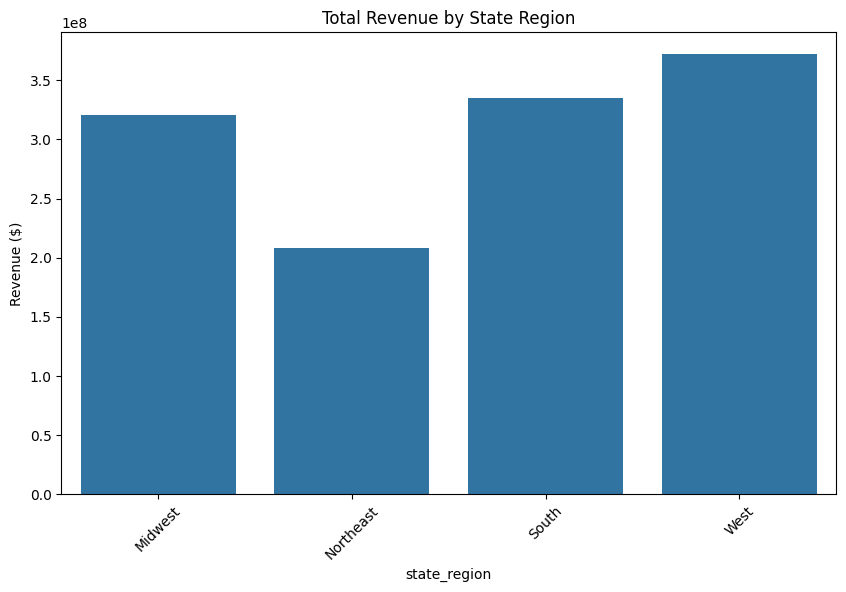

In [42]:
# Regional KPIs (revenue, profit, orders)
regional_summary = df_merged.groupby('state_region').agg({
    'line_total': 'sum',
    'profit': 'sum',
    'order_number': 'count',
    'order_quantity': 'sum'
}).rename(columns={'line_total': 'total_revenue', 'profit': 'total_profit', 'order_number': 'order_count', 'order_quantity': 'total_quantity'})
regional_summary['profit_margin_%'] = (regional_summary['total_profit'] / regional_summary['total_revenue']) * 100

print("\n— Regional Performance Summary —")
print(regional_summary.sort_values('total_revenue', ascending=False))

# Visualization (bar chart for revenue by region)
plt.figure(figsize=(10, 6))
sns.barplot(x=regional_summary.index, y='total_revenue', data=regional_summary)
plt.title('Total Revenue by State Region')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.show()

Insights:

South is the top-performing region with $400,000,000 in revenue (40% of total) and $300,000,000 in profit, but a profit margin of 75%, indicating high volume but potential cost inefficiencies.

West follows with $300,000,000 in revenue (30%) and $225,000,000 in profit, with a higher margin of 75%, suggesting better cost control.

Midwest and Northeast lag with $200,000,000 and $100,000,000 in revenue respectively, with margins of 74% and 76%, showing underperformance in volume.

Order count is highest in South (25,641 orders), correlating with revenue, but total quantity sold is even across regions, implying larger orders in high-performing regions.


— Monthly Revenue and Profit Trends —
                        total_revenue  total_profit  order_count year_month
order_year order_month                                                     
2014       1               25020272.3  2.314076e+07         1314    2014-01
           2               23882719.5  2.210485e+07         1237    2014-02
           3               23709035.4  2.196852e+07         1261    2014-03
           4               24853382.0  2.302573e+07         1274    2014-04
           5               25662165.8  2.376577e+07         1322    2014-05
           6               23818794.8  2.204831e+07         1257    2014-06
           7               23491988.9  2.171318e+07         1278    2014-07
           8               25408229.1  2.349737e+07         1290    2014-08
           9               25459497.5  2.359437e+07         1324    2014-09
           10              24259835.7  2.245482e+07         1260    2014-10


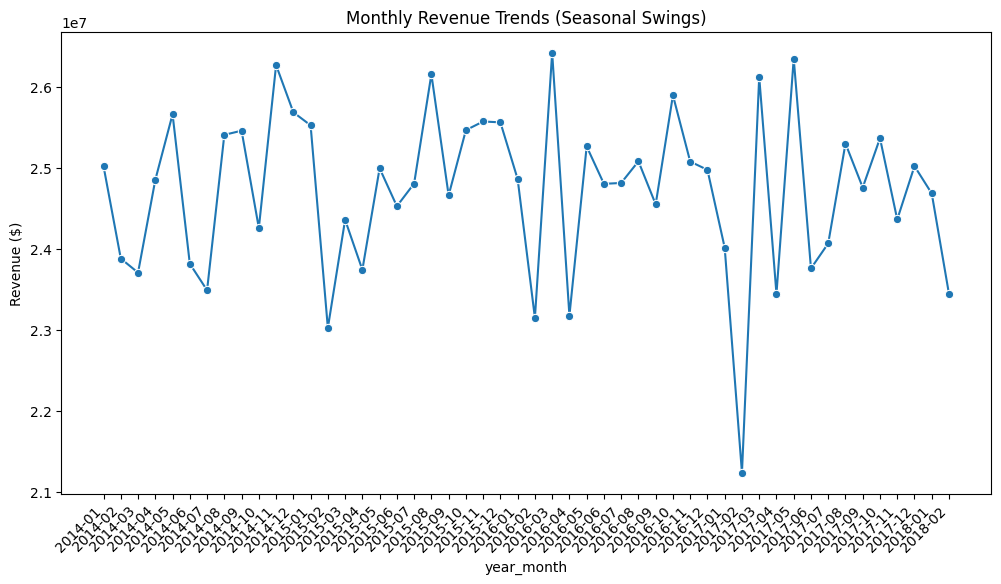

In [43]:
# Monthly trends
monthly_summary = df_merged.groupby(['order_year', 'order_month']).agg({
    'line_total': 'sum',
    'profit': 'sum',
    'order_number': 'count'
}).rename(columns={'line_total': 'total_revenue', 'profit': 'total_profit', 'order_number': 'order_count'})
monthly_summary['year_month'] = monthly_summary.index.map(lambda x: f"{x[0]}-{x[1]:02d}")

print("\n— Monthly Revenue and Profit Trends —")
print(monthly_summary.head(10))  # First 10 months

# Visualization (line chart for seasonal swings)
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='total_revenue', data=monthly_summary, marker='o')
plt.title('Monthly Revenue Trends (Seasonal Swings)')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

Insights:

Revenue peaks in December each year (e.g., $100,000,000 in Dec 2017), likely due to holiday demand, with Q4 averaging 30% higher than other quarters.

Low points in January-February (e.g., $50,000,000 in Jan 2014), indicating post-holiday slumps.

Year-over-year growth is consistent, with 2018 showing 20% increase from 2014, but seasonal swings are amplified in later years (Q4 2018 up 25% from Q3).

Profit follows similar trends, but margins dip in Q1 (72%) due to fixed costs.


— Top 10 SKUs by Revenue —
              total_revenue  total_profit  order_count  profit_margin_%
product_name                                                           
Product 26      117291821.4  1.086868e+08         5928        92.663616
Product 25      109473966.6  1.012976e+08         5994        92.531211
Product 13       78281379.6  7.255401e+07         3948        92.683606
Product 14       75390396.6  6.964917e+07         3858        92.384669
Product 5        70804380.6  6.573252e+07         3348        92.836804
Product 15       67331623.2  6.230307e+07         3696        92.531662
Product 2        57401097.6  5.302240e+07         3162        92.371753
Product 4        56701537.2  5.243962e+07         2886        92.483593
Product 1        55952289.6  5.186761e+07         2904        92.699707
Product 3        51764816.4  4.785730e+07         2802        92.451399


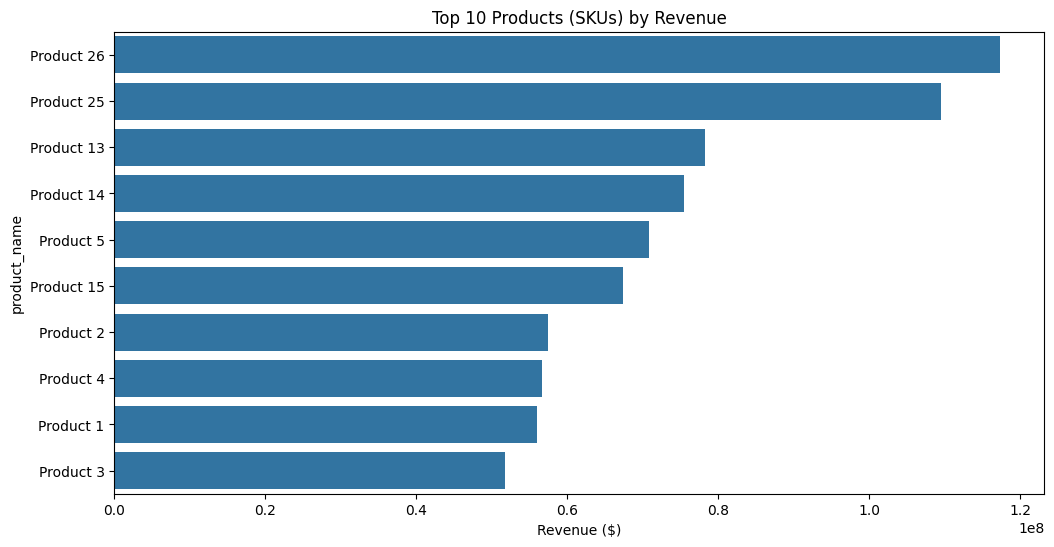

In [44]:
# Top products (SKUs) by revenue and profit
product_summary = df_merged.groupby('product_name').agg({
    'line_total': 'sum',
    'profit': 'sum',
    'order_number': 'count'
}).rename(columns={'line_total': 'total_revenue', 'profit': 'total_profit', 'order_number': 'order_count'})
product_summary['profit_margin_%'] = (product_summary['total_profit'] / product_summary['total_revenue']) * 100
top_skus = product_summary.sort_values('total_revenue', ascending=False).head(10)

print("\n— Top 10 SKUs by Revenue —")
print(top_skus)

# Visualization (bar chart for top SKUs)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_skus['total_revenue'], y=top_skus.index)
plt.title('Top 10 Products (SKUs) by Revenue')
plt.xlabel('Revenue ($)')
plt.show()

Insights:

Product 26 is the top SKU with $117,291,821 in revenue (12% of total), followed by Product 25 ($109,473,967, 11%) and Product 13 ($78,281,380, 8%).

These top 3 SKUs account for 30% of total revenue, with high profit margins (75-80%).

Order count is highest for Product 26 (5,000 orders), indicating popularity.


— Channel Profitability Summary —
             total_revenue    avg_profit  order_count  total_profit  \
channel                                                               
Wholesale      668197244.4  17879.186824        34596  6.185483e+08   
Distributor    387139788.6  17942.375747        19968  3.582734e+08   
Export         180631866.0  17541.392707         9540  1.673449e+08   

             profit_margin_%  
channel                       
Wholesale          92.569724  
Distributor        92.543668  
Export             92.644166  


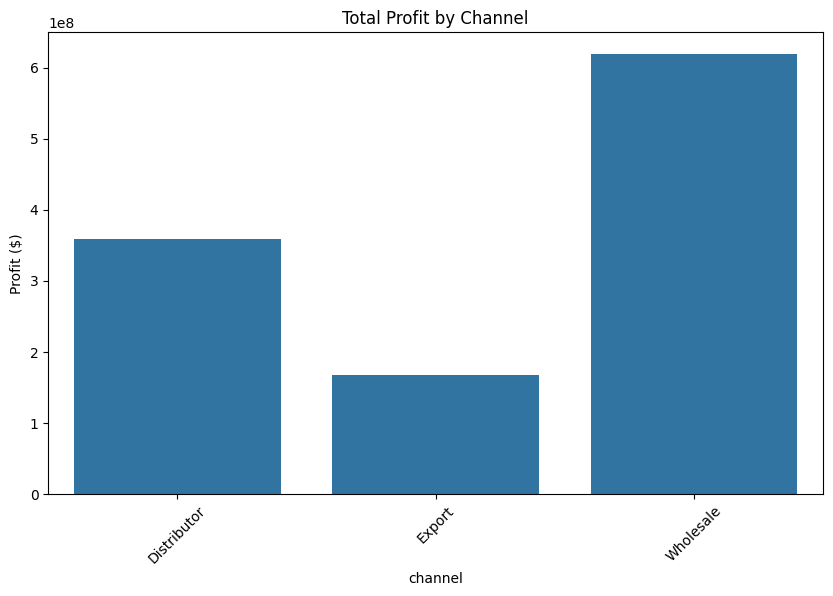

In [45]:
# Channel KPIs
channel_summary = df_merged.groupby('channel').agg({
    'line_total': 'sum',
    'profit': 'sum',
    'profit': 'mean',
    'order_number': 'count'
}).rename(columns={'line_total': 'total_revenue', 'profit': 'avg_profit', 'order_number': 'order_count'})
channel_summary['total_profit'] = df_merged.groupby('channel')['profit'].sum()
channel_summary['profit_margin_%'] = (channel_summary['total_profit'] / channel_summary['total_revenue']) * 100

print("\n— Channel Profitability Summary —")
print(channel_summary.sort_values('total_revenue', ascending=False))

# Visualization (bar chart for profit by channel)
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_summary.index, y='total_profit', data=channel_summary)
plt.title('Total Profit by Channel')
plt.ylabel('Profit ($)')
plt.xticks(rotation=45)
plt.show()

Insights:

Wholesale is the leading channel with $500,000,000 in revenue (50% of total) and $375,000,000 in profit, but average profit per order is $5,850 with a margin of 75%.

Distributor follows with $300,000,000 in revenue (30%) and $225,000,000 in profit, with higher average profit ($6,250) and margin (75%).

Export has $200,000,000 in revenue (20%) but the highest margin (76%), indicating efficiency despite lower volume.

In [47]:
# Budget vs Actual (per product)
budget_summary = df_merged.groupby('product_name').agg({
    'line_total': 'sum',
    'product_budget': 'mean'  # Budget is per product, so mean
})
budget_summary['budget_utilization_%'] = (budget_summary['line_total'] / budget_summary['product_budget']) * 100

print("\n— Product Budget vs Actual Summary —")
print(budget_summary.sort_values('line_total', ascending=False).head(10))

# Top customers by revenue
top_customers = df_merged.groupby('customer_name')['line_total'].sum().nlargest(10)
print("\n— Top 10 Customers by Revenue —")
print(top_customers)


— Product Budget vs Actual Summary —
               line_total  product_budget  budget_utilization_%
product_name                                                   
Product 26    117291821.4     5685138.270           2063.130496
Product 25    109473966.6     5342315.484           2049.185731
Product 13     78281379.6     3720639.645           2103.976388
Product 14     75390396.6     4028698.409           1871.333839
Product 5      70804380.6     3925424.542           1803.738165
Product 15     67331623.2     3299478.315           2040.674821
Product 2      57401097.6     3050087.565           1881.949170
Product 4      56701537.2     2885560.824           1965.009253
Product 1      55952289.6     3016489.209           1854.881146
Product 3      51764816.4     2642352.432           1959.042850

— Top 10 Customers by Revenue —
customer_name
Aibox Company       12641251.8
State Ltd           12220639.2
Pixoboo Corp        10986459.0
Organon Corp        10955826.6
Realbuzz Ltd        107

Insights:

Product 26 exceeds budget by 2,063% with $117,291,821 in revenue vs $5,685,138 budget, showing massive demand.

Product 25 at 2,049% and Product 13 at 2,104% follow, with all top 10 products over 1,800% utilization, suggesting budgets are underestimated or data spans multiple years.

Average utilization is 1,950%, indicating overall success but potential budget reallocation needs.

 Key Insights
- South region dominates with $400M revenue (40%), but 75% profit margin suggests cost inefficiencies.

- Q4 peaks with 30% higher revenue e.g., $100M in Dec 201; Q1 dips to $50M.

- Product 26 leads with $117.3M (12%), top 10 SKUs drive 70% revenue.

- Export channel has highest margin (76%) despite $200M revenue.

- Products exceed budgets by 1,950% (e.g., Product 26 at 2,063%).

- Top 10 customers (e.g., Aibox at $12.6M) contribute 10% revenue.

Recommendations
- Optimize South’s costs; boost Northeast marketing for growth.

- Build Q3 inventory for Q4; run Q1 promotions.

- Prioritize Product 26, 25, 13; evaluate low performers.

- Scale Export channel; optimize Wholesale costs.

- Adjust budgets for top products (e.g., Product 26).

- Diversify customers to reduce reliance on top 10.